# Tarea 1_ Red neuronal Perceptrón multicapa TF2

Este trabajo es un clasificador de prendas de ropa en 10 clases.
Los resultados obtenidos fueron de:
* Exactitud en el entrenamiento: 76.92654418945312%
* Pérdida en el entrenamiento: 31.93520736694336%
* Exactitud en la prueba: 73.13999938964844% 
* Pérdida en la prueba: 37.12417984008789%

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Esta tarea usa el set de datos de Fashion MNIST de más de 70,000 imágenes en 10 categorias. Las imágenes muestran artículos individuales de ropa a una resolucion de 28 por 28 pixeles.

In [2]:
from tensorflow.keras.datasets.fashion_mnist import load_data
fashion_mnist = load_data()

4431872/4422102 [==============================] - 0s 0us/step


# Separando el conjunto de datos en entrenamiento y prueba 

Primero se separan los datos en conjuntos de entrenamiento y prueba con sus respectivas etiquetas.

In [3]:
(x_train, y_train), (x_test, y_test)= fashion_mnist

Observamos que son 60k imágenes para el entrenamiento.

In [4]:
x_train.shape

(60000, 28, 28)

Se grafica una de estas imágenes para corroborar que se trate de un artículo de ropa.

In [5]:
imagendemo=x_train[0,:,:]

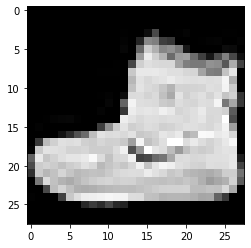

In [6]:
plt.imshow(imagendemo,cmap='gray')

Posteriormente se estandarizan los valores de las imágenes a un rango de 0 a 1.

Nota 1: Estandarizando las imágenes, mejora el porcentaje de accuracy del 0.8485 al 0.9395 con 15 épocas.

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Se presentan las clases correspondientes y se almacenan en el diccionario label_dict{ }.

In [8]:
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

In [9]:
label_dict[y_train[0]]

'Ankle boot'

# ¡¡¡Suerte :D !!!

Dankeschön!

## Ajustando los datos

Se convierten las entradas bidimensionales a unidimensionales por medio del reshape, esto se podría realizar con una capa tipo "Flatten" pero desconocía si al agregar la capa ya no sería contemplada como una Red Vanilla jeje.

In [10]:
x_train=x_train.reshape(-1,28*28).astype('float32')
x_test=x_test.reshape(-1,28*28).astype('float32')
x_train.shape

(60000, 784)

El convertir la salida de etiquetas a un vector one_hot cambia la exactitud de 89.11% a 89.16% con 5 épocas, por lo que se hace el cambio.

In [29]:
# Convertir el array de salidas a una codificación one_ hot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
# Cambiamos el y_train a una forma (numero de datos, etiqueta categorica)
y_train = y_train.reshape(len(y_train), 1)
# Y cambiamos a un vector one-hot
y_train_onehot = onehot_encoder.fit_transform(y_train)

# Cambiamos el y_test a una forma (numero de datos, etiqueta categorica)
y_test = y_test.reshape(len(y_test), 1)
# Y cambiamos a un vector one-hot
y_test_onehot = onehot_encoder.fit_transform(y_test)

y_train_onehot.shape

(60000, 10)

## Declarando la arquitectura con Keras

TF2 se maneja bajo la programación orientada a objetos (POO).

Ahora sí, la arquitectura de esta red son dos primeras capas densas de 128 neuronas y función de activación relu y una capa densa de salida de 10 neuronas puesto que queremos que clasifique entre 10 categorías distintas.

In [52]:
class DNN_model(object):
  # Inicializa el objeto con todo aquello dentro del def __init__
  def __init__(self,
               n_nodes_hl1=128,
               n_nodes_hl2=128,
               n_classes=10):
    #Cada capa de la red, sus pesos y bias, se vuelven un atributo del objeto
    
    #Todos los parametros son tf.Variable.
    #Se nombra a cada parte de la capa n como "hlnweigths", "hlnbias".
    #El tipo de dato más adecuado en TF2 es float32

    #Primera capa
    self.h1LW = tf.Variable(np.random.rand(784, n_nodes_hl1),name="hl1weigths",dtype="float32")
    self.h1LB = tf.Variable(np.random.rand(n_nodes_hl1),name="hl1bias",dtype="float32")
    #Segunda capa
    self.h2LW = tf.Variable(np.random.rand(n_nodes_hl1, n_nodes_hl2),name="hl2weigths",dtype="float32")
    self.h2LB = tf.Variable(np.random.rand(n_nodes_hl2),name="hl2bias",dtype="float32")
    #Tercera capa
    self.outW = tf.Variable(np.random.rand(n_nodes_hl2, n_classes),name="outweigths",dtype="float32")
    self.outB = tf.Variable(np.random.rand(n_classes),name="outbias",dtype="float32")

    #Estos son los elementos que ajustará el optimizador
    self.trainable_variables =[self.h1LW,self.h1LB,self.h2LW,self.h2LB,self.outW,self.outB]          
  
  def __call__(self,x): 
      # Para nuestra DNN, la propagación hacia adelante involucra Y = X*W+B
        #      Ya = tf.add(tf.matmul(x,self.hnLB), self.hnLB)
      # Después le aplicamos la función de activación
        #      Yn = tf.nn.relu(Ya)


      l1 = tf.add(tf.matmul(x,self.h1LW), self.h1LB)
      l1 = tf.nn.relu(l1)

      l2 = tf.add(tf.matmul(l1,self.h2LW), self.h2LB)
      l2 = tf.nn.relu(l2)

      output = tf.matmul(l2,self.outW) + self.outB
      return output

      #Cada vez que llamemos a la red, se ejecuta la propagación hacia adelante

In [53]:
# Creando un objeto DNN_model()
DNN = DNN_model()
#Mandamos a llamar la propagación hacia adelante del objeto DNN
DNN(x_train[24:30])

<tf.Tensor: shape=(6, 10), dtype=float32, numpy=
array([[756040.44, 662818.1 , 701966.3 , 750872.25, 753924.6 , 680105.94,
        754993.1 , 747426.56, 714634.6 , 686472.75],
       [552315.9 , 484200.1 , 512762.7 , 548528.9 , 550815.56, 496814.38,
        551531.  , 546000.25, 522056.1 , 501469.4 ],
       [623158.8 , 546317.8 , 578605.6 , 618896.6 , 621423.  , 560605.56,
        622324.4 , 616078.9 , 589000.4 , 565765.1 ],
       [914962.8 , 802148.44, 849539.94, 908702.9 , 912398.9 , 823104.06,
        913736.1 , 904561.94, 864833.75, 830750.1 ],
       [502844.3 , 440858.88, 466897.5 , 499432.8 , 501440.12, 452373.34,
        502162.53, 497132.1 , 475311.97, 456599.88],
       [791556.56, 693922.44, 734947.06, 786145.6 , 789316.3 , 712089.94,
        790470.94, 782539.25, 748179.56, 718719.06]], dtype=float32)>

Seleccionando un optimizador

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Éstas son agregadas durante el paso de compilacion del modelo:

+ Loss function: Mide qué tan exacto es el modelo. Se busca minimizar su valor para dirigir el modelo en la dirección adecuada.
+ Optimizer: Cómo el modelo se actualiza basado en el set de datos que ve y la función de pérdida. Por default el factor de aprendizaje es de 0.001
+ Metrics: Métricas de validación, monitorean los pasos de entrenamiento y pruebas. El accuracy (exactitud), arroja la fración de entradas correctamente clasificadas.

In [54]:
#Este optimizador viene en Keras
#optimizador = tf.keras.optimizers.Adam(learning_rate=0.001 ) 

#Este optimizador viene de TF1
optimizador = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

#Se eligió el que mejores resultados de exactitud otorgó.

Definiendo las métricas

In [55]:
# Funciones de costo
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

# Funciones de exactitud
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

Cálculo de gradientes y ajuste

In [56]:
#Declaramos el paso de entrenamiento
def train_step(model,tdata, labels):
  #Esta funcion recibe el modelo, los datos de entrenamiento y sus etiquetas
  with tf.GradientTape() as tape:
    #Cargamos el calculo de gradiente de tensorflow y lo renombramos como tape (la cinta del gradiente)
    #Hacemos la propagacion hacia delante de los datos de entrenamiento
    predictions = model(tdata)
    #Cálculo de una funcion de error 
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))
    #Aqui estamos usando la funcion de error y le indicamos
    #que se calcula con la diferencia entre la prediccion y la etiqueta

  #Se calcula el gradiente de pérdida con respecto a los pesos y bias
  gradients = tape.gradient(loss, model.trainable_variables)

  # Ordenando en tuplas: (gradiente, variable)
  capped_grads_and_vars = [(grad,model.trainable_variables[index]) for index, grad in enumerate(gradients)]
  
  #Ya con los gradientes y variables ordenados, ejecutamos el optimizador que elegimos
  optimizador.apply_gradients(capped_grads_and_vars)

  # Desplegamos el error y exactitud
  train_loss(loss)
  train_accuracy(labels, predictions)

In [57]:
# Probando la función
train_step(DNN,x_train[24:30], y_train_onehot[24:30])

In [58]:
#Esta es la funcion de prueba, para propagar sin modificar los datos
def test_step(model,tdata, labels):
  predictions = model(tdata)
  t_loss =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [59]:
test_step(DNN,x_train[24:30], y_train_onehot[24:30])

## Entrenamiento

Posteriormente se hace el entrenamiento para asociar las imágenes con sus respectivas etiquetas. Entre mayor sea la cantidad de épocas, mayor costo computacional requerirá pero en la mayoría de las veces el modelo se ajustará mejor a las entradas.

In [60]:
#En esta funcion hacemos el entrenamiento de la DNN
def fitting(model,train_x,train_y,test_x,test_y,EPOCHS,N_batch,batch_size):

  #Hacemos el ciclo de épocas
  for epoch in range(EPOCHS):
    i=0
    #Hacemos el ciclo por lote
    while i+batch_size < len(train_x) or i+batch_size<batch_size*N_batch:
      #Aqui ya no tenemos las funciones para separar los dataset por lotes
      #Necesitamos separar los lotes a mano
      start = i
      end = i+batch_size
      #Hacemos las rebanadas del tamaño del lote a usar
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      #Ejecutamos el paso de entrenamiento
      train_step(model,batch_x,batch_y)
      i+=batch_size
    #Ejecutamos el paso de prueba
    test_step(model,test_x,test_y)

    #Con cada época imprimimos en pantalla el resultado      
    template = 'Epoch {}, Perdida: {}, Exactitud: {}, Perdida de prueba: {}, Exactitud de prueba: {}'
    print(template.format(epoch+1,
                         train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
    
    #Al finalizar la epoca, reiniciamos los errores y exactitudes para que no se acumulen con el anterior
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

In [63]:
fitting(DNN,x_train,y_train_onehot,x_test,y_test_onehot,15,600,100)

Epoch 1, Perdida: 43.077857971191406, Exactitud: 61.351173400878906, Perdida de prueba: 113.33805084228516, Exactitud de prueba: 49.540000915527344
Epoch 2, Perdida: 43.66661071777344, Exactitud: 65.27545928955078, Perdida de prueba: 44.75971221923828, Exactitud de prueba: 64.5
Epoch 3, Perdida: 52.808956146240234, Exactitud: 66.2420654296875, Perdida de prueba: 39.670936584472656, Exactitud de prueba: 68.11000061035156
Epoch 4, Perdida: 49.21403884887695, Exactitud: 67.5575942993164, Perdida de prueba: 41.82698440551758, Exactitud de prueba: 65.68000030517578
Epoch 5, Perdida: 41.73030471801758, Exactitud: 71.2637710571289, Perdida de prueba: 43.38935470581055, Exactitud de prueba: 71.33000183105469
Epoch 6, Perdida: 41.7012939453125, Exactitud: 71.5575942993164, Perdida de prueba: 31.77854347229004, Exactitud de prueba: 74.62999725341797
Epoch 7, Perdida: 44.70228958129883, Exactitud: 71.86644744873047, Perdida de prueba: 40.079898834228516, Exactitud de prueba: 72.3699951171875
Epoc